In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn


Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Initialize the quantile regression object for mc
qr_mc_NoWeights= quantileRegression("mc")
qr_mc_ConWeights= quantileRegression("mc")
qr_mc_NoWeights2= quantileRegression("mc")
qr_mc_ConWeights2= quantileRegression("mc")

print "Load the mc dataframe"
startEvt = 0
stopEvt   = 2000000
print "Load the mc dataframe"
qr_mc_NoWeights.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_ConWeights.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_NoWeights2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_ConWeights2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)

Load the mc dataframe
Load the mc dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [8]:
print "Get the corrected data-mc values"
import pandas as pd
qr_mc_NoWeights.correctAllY(X, ylist, quantiles, EBEE="EE",relativePath= "weights_NoWeights")
qr_mc_ConWeights.correctAllY(X, ylist, quantiles, EBEE="EE",relativePath= "weights_ConWeights")
qr_mc_NoWeights2.correctAllY(X, ylist, quantiles, EBEE="EB",relativePath= "weights_NoWeights")
qr_mc_ConWeights2.correctAllY(X, ylist, quantiles, EBEE="EB",relativePath= "weights_ConWeights")


dfmc_NoWeights= qr_mc_NoWeights.getDF()
dfmc_ConWeights= qr_mc_ConWeights.getDF()
dfmc_NoWeights2= qr_mc_NoWeights2.getDF()
dfmc_ConWeights2= qr_mc_ConWeights2.getDF()
frame1 = [dfmc_NoWeights, dfmc_NoWeights2]
data = pd.concat(frame1)
dfmc_NoWeights = data.reset_index()

frame2 = [dfmc_ConWeights, dfmc_ConWeights2]
data2 = pd.concat(frame2)
dfmc_ConWeights = data2.reset_index()

       

Get the corrected data-mc values
Loading corrected targets from :  correctedTargetsweights_NoWeights_EE.h5
Loading corrected targets from :  correctedTargetsweights_ConWeights_EE.h5
Loading corrected targets from :  correctedTargetsweights_NoWeights_EB.h5
Loading corrected targets from :  correctedTargetsweights_ConWeights_EB.h5


In [9]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvt = 0
stopEvt   = 2000000
print "Load the data dataframe"
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5", startEvt, stopEvt)
dfdata = qr_data.getDF()

Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [10]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

['R9']
plotting  R9


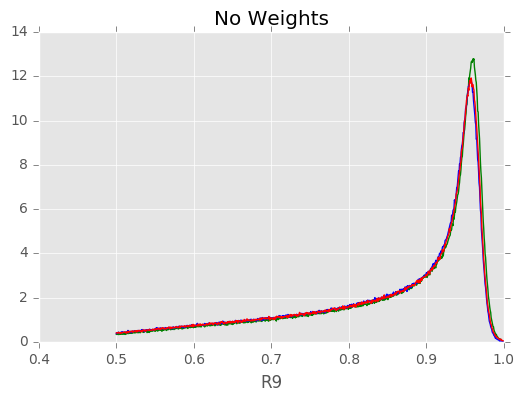

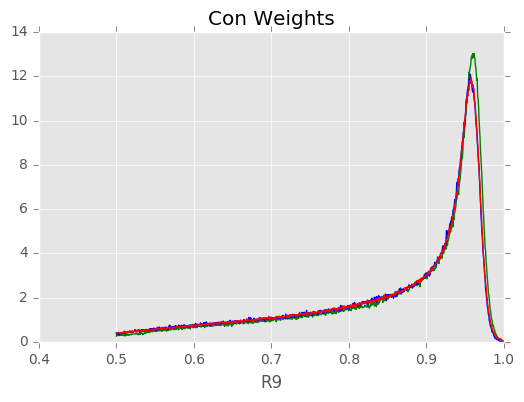

In [40]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.5,1.0,0.0006)
        rv3 = np.arange(0.5,0.95,0.008)
        
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1)
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")
    ax.set_title('No Weights')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_ConWeights[yvar], rv2, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]
    plt.plot(edges,mc_bins,"g")
    mccorr_bins, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv2, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,mccorr_bins,"b")
    data_bins, _edges = np.histogram(dfdata[yvar], rv2, normed = 1,weights=dfdata["weight"])
    edges = _edges[:len(_edges)-1]
    plt.plot(edges  ,data_bins,"r")
    ax.set_title('Con Weights')

['R9']
plotting  R9


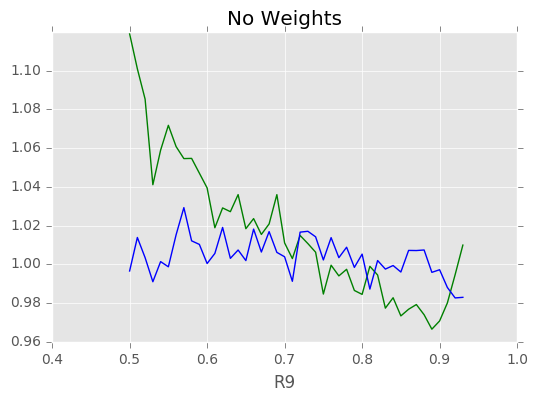

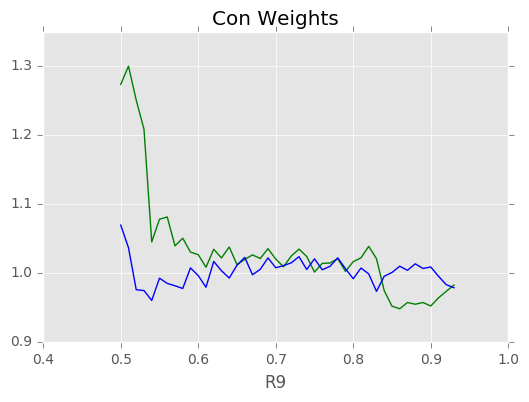

In [33]:
#ratio plots
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.1,1.0,0.005)
        rv3 = np.arange(0.5,0.95,0.01)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv3, normed = 1)
    edges = _edges[:len(_edges)-1]
    
 
    
    h1 = data_bins/mc_bins
    h2 = data_bins/mccorr_bins
    
    plt.plot(edges,h1,"g")# uncorrected
    plt.plot(edges,h2,"b")#corrected
    ax.set_title('No Weights')
    
    #ratio plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_ConWeights[yvar], rv3, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv3, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv3, normed = 1, weights=dfdata["weight"])
    edges = _edges[:len(_edges)-1]
    
 
    
    h1 = data_bins/mc_bins
    h2 = data_bins/mccorr_bins
    
    plt.plot(edges,h1,"g")# uncorrected
    plt.plot(edges,h2,"b")#corrected
    ax.set_title('Con Weights')


In [41]:
#our variables are dfmc and dfdata, let's work with them.
#let's see how the profiles generally are.
#poors man profile plot
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

def Profile(x,y,nbins,xmin,xmax,ax, color):
    df = DataFrame({'x' : x , 'y' : y})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    for bin in bins:
        ProfileFrame.ix[bin,'ymean']      = df.ix[df['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev']  = df.ix[df['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax



plotting  R9


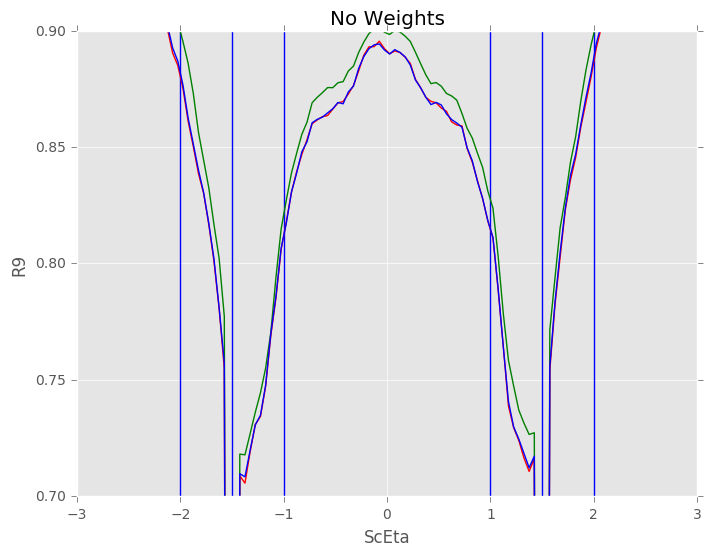

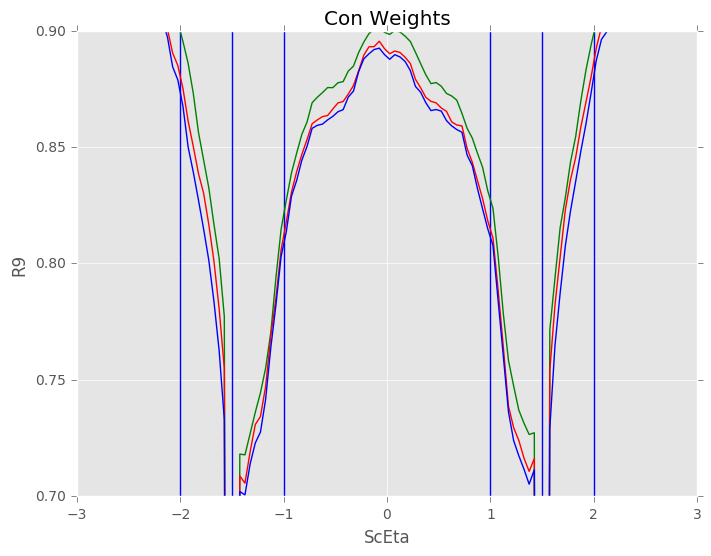

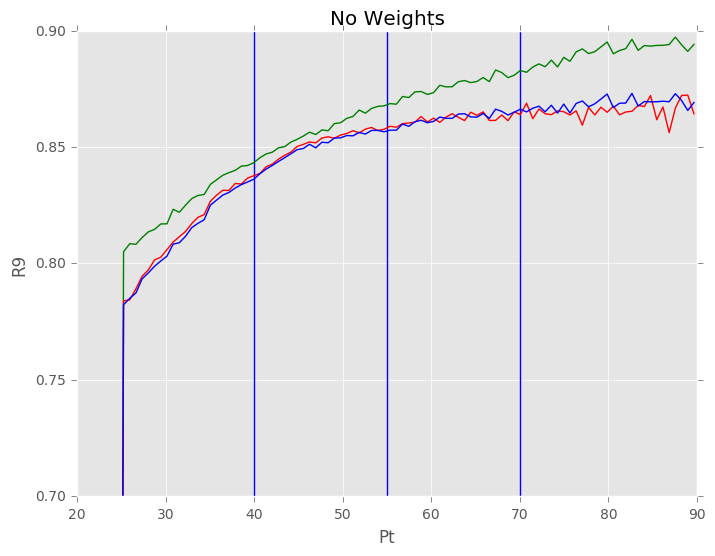

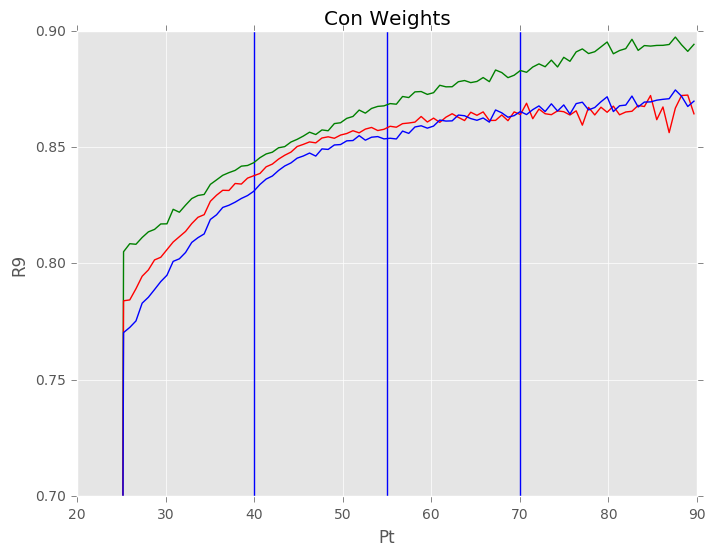

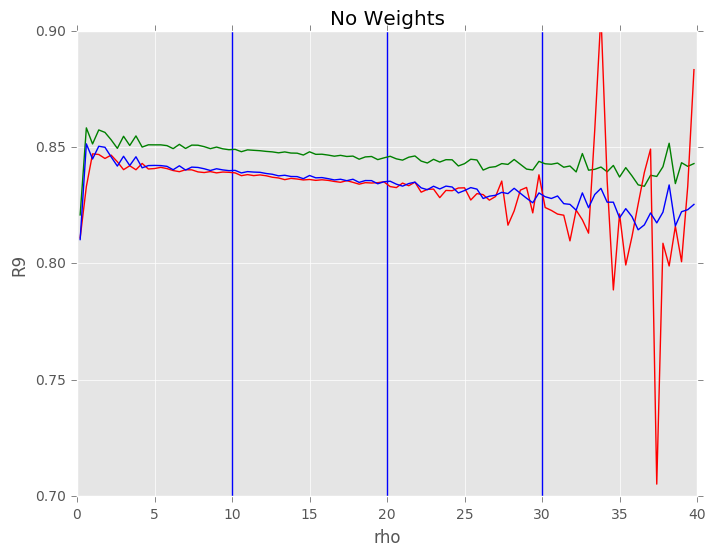

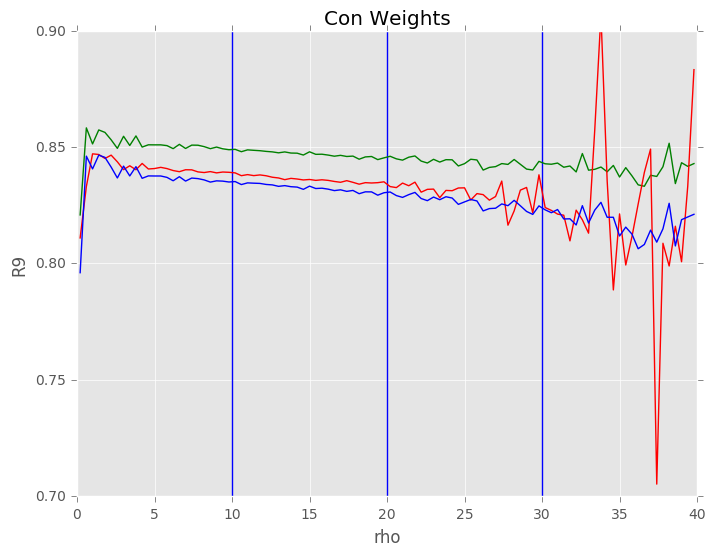

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=1)
    ax.axvline(x=-1)
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    ax.axvline(x=2)
    ax.axvline(x=-2)
    
    Profile(dfmc_NoWeights['ScEta']  , dfmc_NoWeights[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmc_NoWeights['ScEta']  , dfmc_NoWeights[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
    ax.set_title('No Weights')  
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=1)
    ax.axvline(x=-1)
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    ax.axvline(x=2)
    ax.axvline(x=-2)
    
    Profile(dfmc_ConWeights['ScEta']  , dfmc_ConWeights[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmc_ConWeights['ScEta']  , dfmc_ConWeights[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
    ax.set_title('Con Weights')  
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=40)
    ax.axvline(x=55)
    ax.axvline(x=70)
    
    Profile(dfmc_NoWeights['Pt']  , dfmc_NoWeights[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmc_NoWeights['Pt']  , dfmc_NoWeights[yvar+'_corr'],100,20.,90.,ax, 'blue')
    ax.set_title('No Weights') 
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=40)
    ax.axvline(x=55)
    ax.axvline(x=70)
    
    Profile(dfmc_ConWeights['Pt']  , dfmc_ConWeights[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmc_ConWeights['Pt']  , dfmc_ConWeights[yvar+'_corr'],100,20.,90.,ax, 'blue')
    ax.set_title('Con Weights') 

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=10)
    ax.axvline(x=20)
    ax.axvline(x=30)
    
    Profile(dfmc_NoWeights['rho']  , dfmc_NoWeights[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmc_NoWeights['rho']  , dfmc_NoWeights[yvar+'_corr'],100,0.,40.,ax, 'blue')
    ax.set_title('No Weights') 
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=10)
    ax.axvline(x=20)
    ax.axvline(x=30)
    
    Profile(dfmc_ConWeights['rho']  , dfmc_ConWeights[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmc_ConWeights['rho']  , dfmc_ConWeights[yvar+'_corr'],100,0.,40.,ax, 'blue')
    ax.set_title('Con Weights') 
